In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
    #Malgun 
%matplotlib inline

In [35]:
df1 = pd.read_csv('data2/서울시 어린이 교통사고 (2005~2009).csv')
df2 = pd.read_csv('data2/서울시 어린이 교통사고(2010~2014).csv')
df3 = pd.read_csv('data2/서울시 어린이 교통사고(2015~2019).csv')
df4 = pd.read_csv('data2/서울시 어린이 교통사고(2020).csv')

In [36]:
df1

,2005,2006,2007,2008,2009
0,"1,453","1,340","1,224","1,248","1,235"


In [37]:
df2

,2010,2011,2012,2013,2014
0,1101,991,771,772,806


In [38]:
df3

,2015,2016,2017,2018,2019
0,738,656,615,557,634


In [39]:
df4

,2020
0,273


In [40]:
df1 = df1.T
df2 = df2.T
df3 = df3.T
df4 = df4.T

In [41]:
df1[0] = df1[0].str.replace(',','')
df1

,0
2005,1453
2006,1340
2007,1224
2008,1248
2009,1235


In [42]:
df2.columns = [0]
df2

,0
2010,1101
2011,991
2012,771
2013,772
2014,806


In [43]:
df3

,0
2015,738
2016,656
2017,615
2018,557
2019,634


In [44]:
df4

,0
2020,273


In [45]:
all = pd.concat([df1,df2,df3,df4],axis=0)

In [46]:
all

,0
2005,1453
2006,1340
2007,1224
2008,1248
2009,1235
2010,1101
2011,991
2012,771
2013,772
2014,806


In [47]:
all.columns=['사고합계']

In [48]:
all['사고합계'] = all['사고합계'].astype(int)

In [49]:
# all.to_csv('data2/어린이 보호구역 사고(2005~2020).csv')

In [50]:
r = pd.read_csv('data2/년도별 어린이 보호구역 합계.csv', index_col=0)

In [51]:
r

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
년도별,212,104,176,143,16,9,9,3,20,12,...,49,43,23,33,32,20,27,42,74,14
총합계,212,316,492,635,651,660,669,672,692,704,...,1433,1476,1499,1532,1564,1584,1611,1653,1727,1741


In [52]:
r = r.T
r

,년도별,총합계
1995,212,212
1996,104,316
1997,176,492
1998,143,635
1999,16,651
2000,9,660
2001,9,669
2002,3,672
2003,20,692
2004,12,704


In [53]:
r.drop('년도별', axis=1,inplace=True)
r

,총합계
1995,212
1996,316
1997,492
1998,635
1999,651
2000,660
2001,669
2002,672
2003,692
2004,704


In [54]:
r.drop(['1995'], inplace=True)

In [55]:
r.drop(['1996','1997','1998','1999','2000','2001','2002','2003','2004'],inplace=True)

In [56]:
r.drop(['2021'],inplace=True)

In [57]:
r.index

Index(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

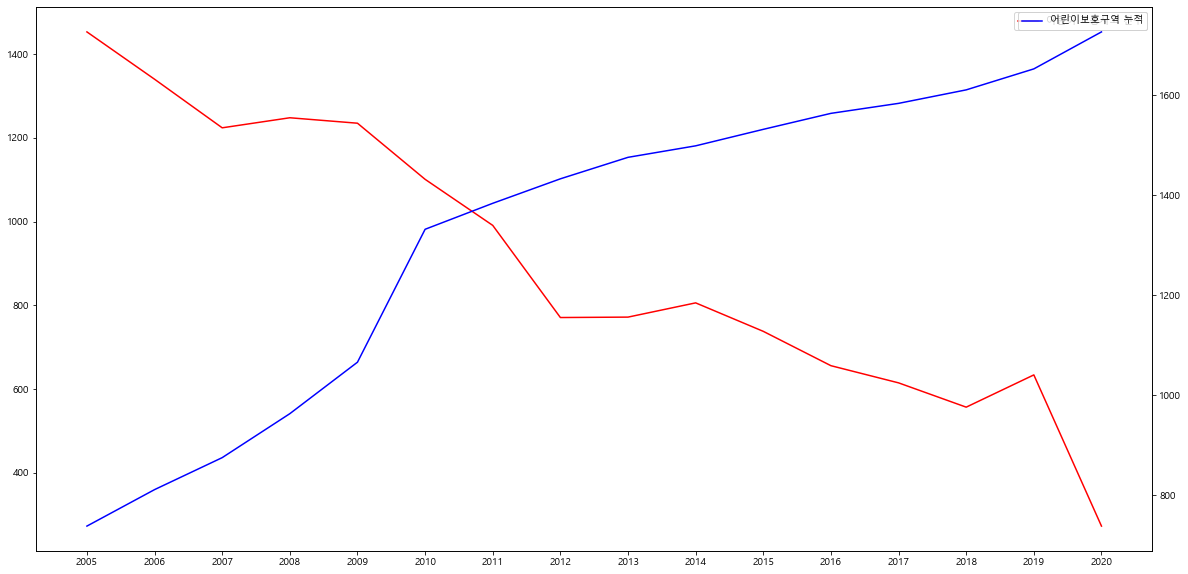

<Figure size 2160x1440 with 0 Axes>

In [58]:
plt.rcParams['figure.figsize'] = (20,10)
fig, ax1 = plt.subplots()
plt.figure(figsize=(30,20))
ax1.plot(all.index, all['사고합계'], color='red', label='어린이 교통사고 건수')
ax2 = ax1.twinx()
ax2.plot(r.index, r['총합계'], color='blue', label = '어린이보호구역 누적')
ax1.legend()
ax2.legend()

plt.show()